# Homework Assignment 2 

## Risk Graph

### (Notebook 2 of 2)



### <p style="text-align: right;"> &#9989; Carla Carreon-Elisea</p>
### <p style="text-align: right;"> &#9989; Car1ita</p>

## Assignment Overview

In this assignment, we'll explore graphs using the board game Risk as our practical example. Risk is a strategy game played on a world map where territories are connected to their neighbors. This makes it a perfect candidate for graph representation and analysis.

### Learning Objectives

- Implement a graph representation of a real-world game board
- practice using networkx
- do some research
- visualize graph data using NetworkX

The assignment is split into two notebooks:
- Notebook 1 of 2 is worth **14 + 33 + 3 = 51 points** 
- Notebook 2 of 2 is worth **1+ 42 + 1 = 44 points** 
for a total of **95 points**. Point values for each part are included in the section headers and question prompts.

**This assignment is due at 11:59 pm on Friday, March 21st.** It should be uploaded into the "Homework Assignments" submission folder for Homework #2 on D2L.  Submission instructions can be found at the end of the notebook. **You must also fill out a survey regarding this assignment.** The link to this survey can also be found at the end of the notebook.

---
## &#128721; STOP
**Pause to add this file and commit your changes to your Git repository! (1 points)**

---

In [19]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import pandas as pd
import numpy as np

---
<a id="part3"></a>
[Back to ToC](#toc)

## Part 3: Creating the Risk Game Graph (42 points)


![image](https://cf.geekdo-images.com/JM6hEipDwIByZKEIK9Dgeg__imagepage/img/OEl2gaJbUxdvIv6tNPzDsQyLUtQ=/fit-in/900x600/filters:no_upscale():strip_icc()/pic365731.jpg)


&#9989; **Question 3.1 (5 points)**: Create a dictionary that defines the territories in Risk, organized by continents. Each territory should include its neighboring territories. Use the image above for completing the code below

In [20]:
# Define the Risk board territories and their connections
risk_territories = {
    'North America': {
        'Alaska': ['Northwest Territory', 'Alberta', 'Kamchatka'],
        'Northwest Territory': ['Alaska', 'Alberta', 'Greenland'],
        'Greenland': ['Northwest Territory', 'Ontario', 'Quebec', 'Iceland'],
        'Alberta': ['Alaska', 'Northwest Territory', 'Ontario', 'Western United States'],
        'Ontario': ['Alberta', 'Northwest Territory', 'Greenland', 'Quebec', 'Western United States', 'Eastern United States'],
        'Quebec': ['Ontario', 'Greenland', 'Eastern United States'],
        'Western United States': ['Alberta', 'Ontario', 'Eastern United States', 'Central America'],
        'Eastern United States': ['Western United States', 'Ontario', 'Quebec', 'Central America'],
        'Central America': ['Western United States', 'Eastern United States', 'Venezuela']
    },
    # Complete the remaining continents
    'South America': {
        # Add territories and their connections
        'Brazil': ['Venezuela', 'Peru', 'Argentina', 'North Africa'],
        'Venezuela': ['Brazil', 'Peru'],
        'Peru': ['Brazil', 'Argentina', 'Venezuela'],
        'Argentina' : ['Peru', 'Brazil']
    },
    'Europe': {
        # Add territories and their connections
        'Western Europe': ['Southern Europe', 'Northern Europe', 'Great Britain'],
        'Southern Europe': ['North Africa', 'Egypt', 'Western Europe', 'Northern Europe', 'Ukraine', 'Middle East'],
        'Northern Europe': ['Western Europe', 'Southern Europe', 'Ukraine', 'Scandinavia', 'Great Britain'],
        'Ukraine': ['Northern Europe', 'Southern Europe', 'Ural', 'Afghanistan', 'Middle East', 'Scandinavia'],
        'Scandinavia': ['Iceland', 'Great Britain', 'Northern Europe', 'Ukraine'],
        'Iceland': ['Greenland', 'Great Britain', 'Scandinavia'],
        'Great Britain': ['Western Europe', 'Northern Europe', 'Iceland', 'Scandinavia']
    },
    'Africa': {
        # Add territories and their connections
        'North Africa': ['Brazil', 'Egypt', 'East Africa', 'Congo', 'Southern Europe'],
        'Egypt': ['North Africa', 'East Africa', 'Middle East', 'Southern Europe'],
        'East Africa': ['Madagascar', 'South Africa', 'Congo', 'North Africa', 'Egypt', 'Middle East'],
        'Congo': ['South Africa', 'East Africa', 'North Africa'],
        'South Africa': ['Congo', 'East Africa', 'Madagascar'],
        'Madagascar': ['South Africa', 'East Africa']
    },
    'Asia': {
        # Add territories and their connections
        'Middle East': ['Egypt', 'Southern Europe', 'East Africa', 'India', 'Afghanistan', 'Ukraine'],
        'India': ['Middle East' , 'Siam', 'China', 'Afghanistan'],
        'Siam': ['India', 'China', 'Indonesia'],
        'China': ['India', 'Siam', 'Afghanistan', 'Ural', 'Siberia', 'Mongolia'],
        'Afghanistan': ['Ural', 'China', 'India', 'Middle East', 'Ukraine'],
        'Ural': ['Afghanistan', 'Siberia', 'China', 'Ukraine'],
        'Siberia': ['Ural', 'Yakutsk', 'Irkutsk', 'China', 'Mongolia'],
        'Yakutsk': ['Siberia', 'Irkutsk', 'Kamchatka'],
        'Irkutsk': ['Mongolia', 'Kamchatka', 'Siberia','Yakutsk'],
        'Mongolia': ['Japan', 'Kamchatka', 'Irkutsk', 'China', 'Siberia'],
        'Japan': ['Mongolia', 'Kamchatka'],
        'Kamchatka': ['Yakutsk', 'Irkutsk', 'Mongolia', 'Japan', 'Alaska'],
    },
    'Australia': {
        # Add territories and their connections
        'Western Australia': ['Eastern Australia', 'Indonesia', 'New Guinea'],
        'Eastern Australia': ['Western Australia', 'New Guinea'],
        'Indonesia': ['Siam', 'Western Australia', 'New Guinea'],
        'New Guinea': ['Indonesia', 'Eastern Australia', 'Western Australia']
    }
}


### Graph Creation

&#9989; **Question 3.2 (7 points)**: Create a NetworkX graph object from the territory definitions. The territories are the nodes of the graph. Implement a function that builds the graph and adds appropriate attributes for continents. _Hint:_ Look up the documentation of `add_node`, what are the possible inputs? Don't forget to connect each territory to its neighbors. Make sure to add plenty of comments in your code.

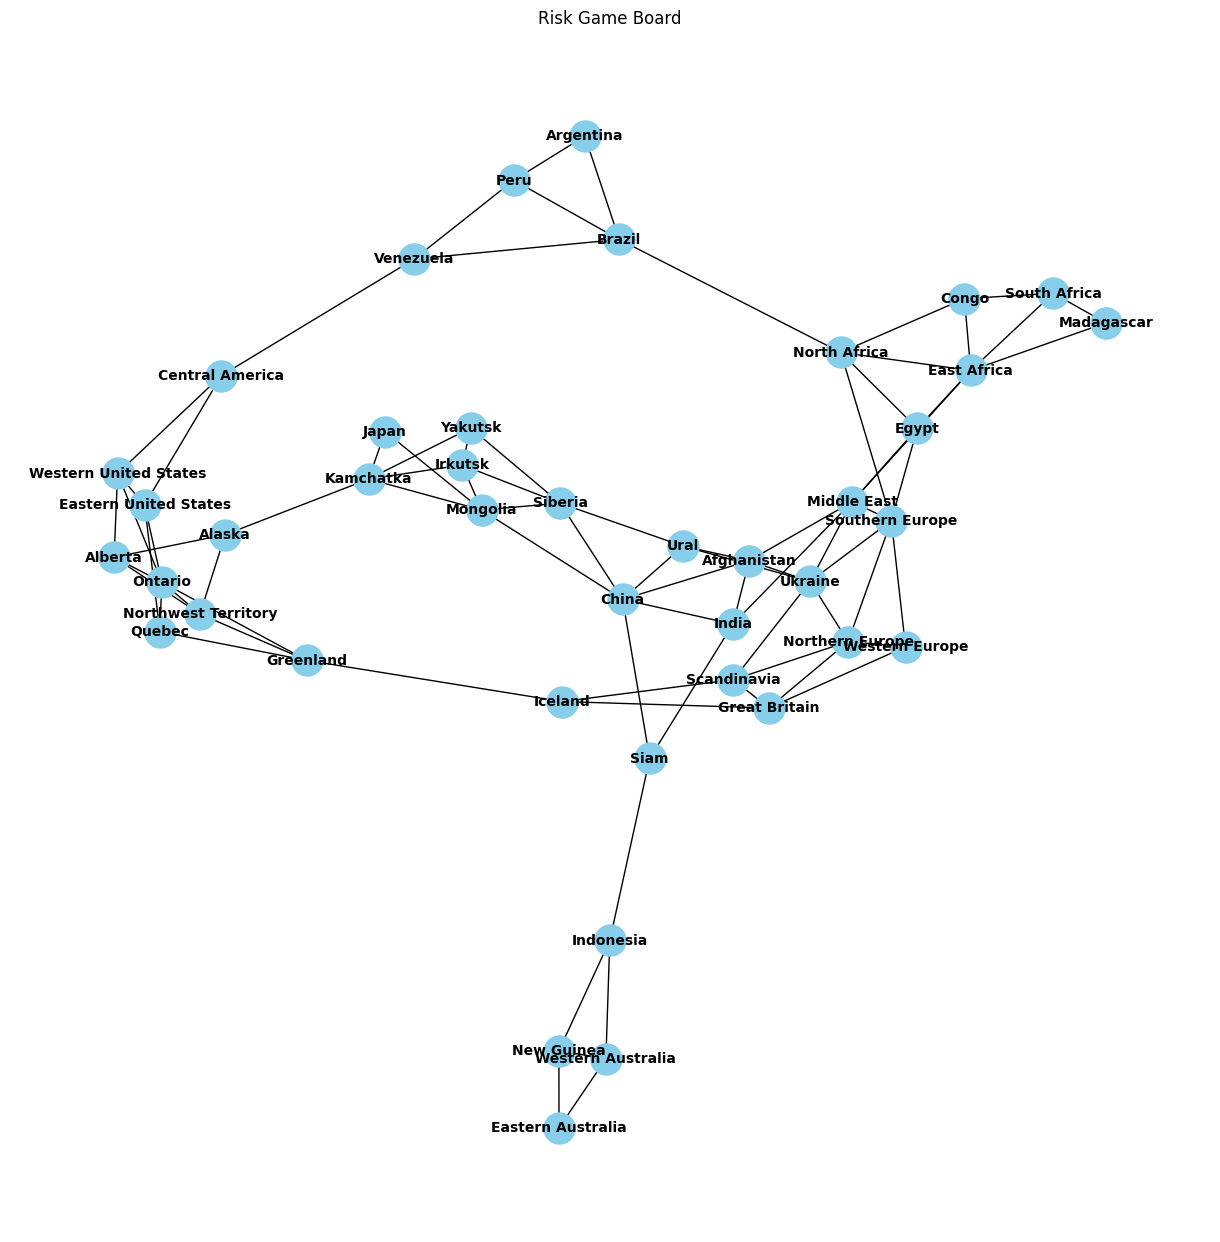

In [21]:
import networkx as nx
import matplotlib.pyplot as plt


def create_risk_graph(territories):
    """
    Create a NetworkX graph from the Risk territory definitions.
    
    Parameters:
        territories (dict): Dictionary containing territory and connection information
        
    Returns:
        G (nx.Graph): NetworkX graph representing the Risk board
    """
    G=nx.Graph()

    for continent,data in territories.items():
        for territory, neighbor in data.items():
            G.add_node(territory, continent=continent)
            for neighbors in neighbor:
                G.add_edge(territory,neighbors)
    return G

# Create the graph
G = create_risk_graph(risk_territories)
plt.figure(figsize=(12,12))
nx.draw(G,with_labels=True,node_size=500, node_color="skyblue", font_size=10,font_weight="bold")
plt.title("Risk Game Board")
plt.show()

### Graph Visualization

&#9989; **Question 3.3 (4 points)**: Create a visualization of the Risk board graph. You can use AI to help you with this. The function below should:

- make a plot of the risk graph.
- color nodes by continent
- allow the user to choose a type of layout. _Hint:_ search networkx documentation for the possible layout. Min 5 layouts should be available.
- print the name of each territory on the respective node
- make a legend for the graph 
- have very descriptive comments 
- increase the size of each node from the default value  
- increase the font size of label from the default value

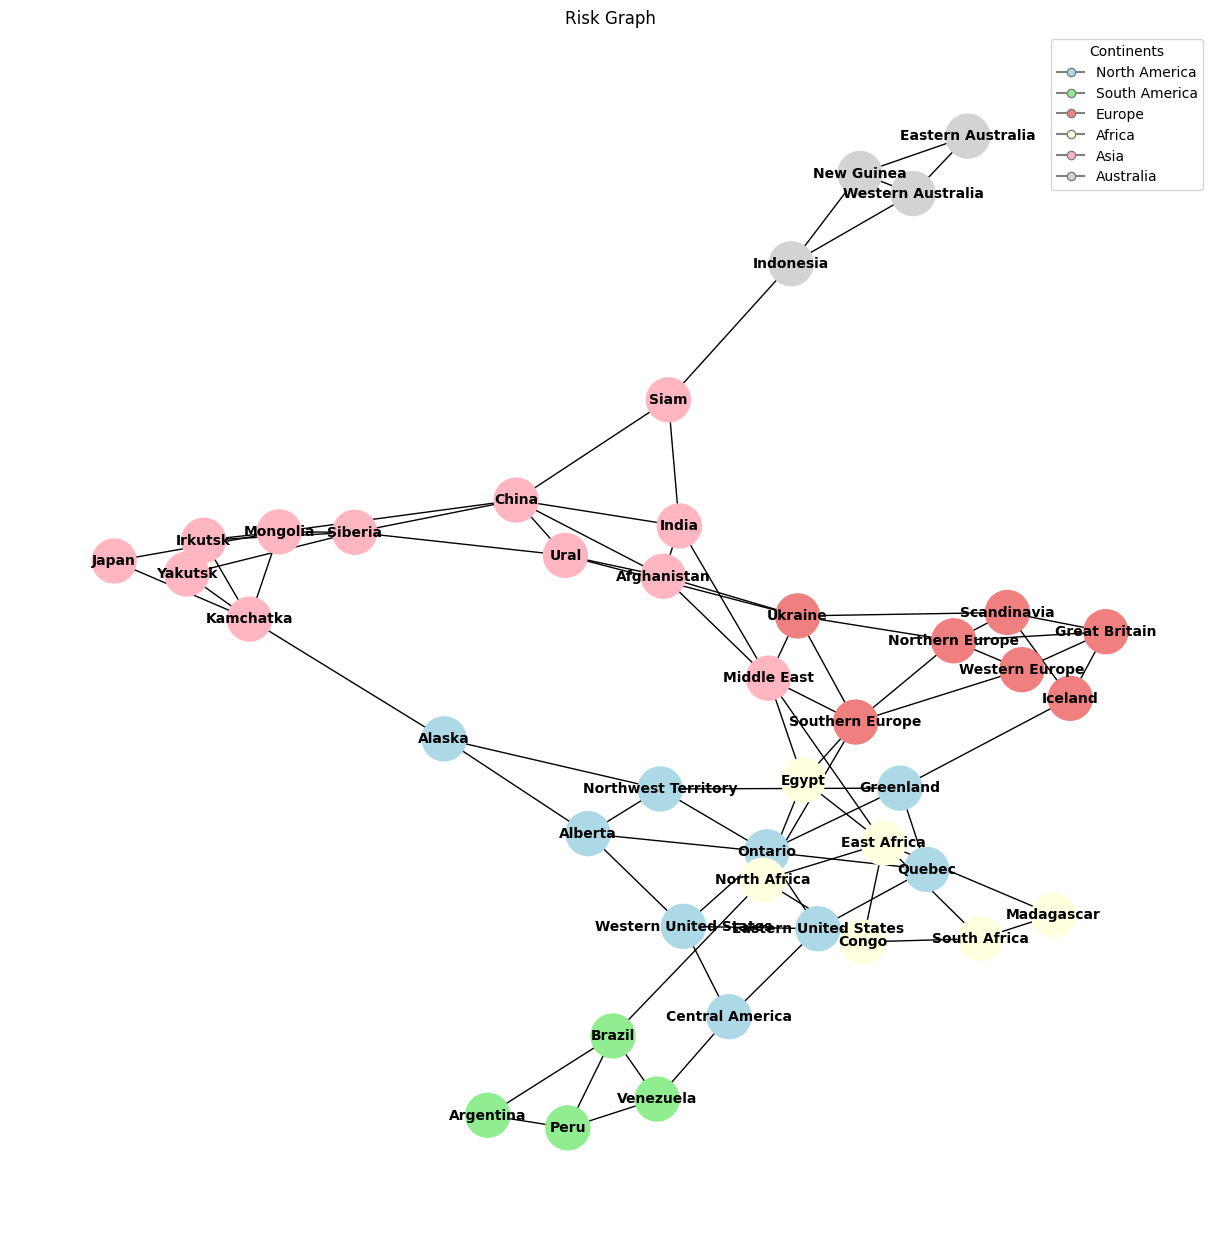

In [22]:
def visualize_risk_graph(G,layout="spring"):
    """
    Create a visualization of the Risk board graph with continents colored differently.
    
    Parameters:
        G (nx.Graph): NetworkX graph of the Risk board
    """
    lay={
        "random": nx.random_layout,
        "circular":nx.circular_layout,
        "spring":nx.spring_layout,
        "spectral":nx.spectral_layout,
        "kamada_kawai":nx.kamada_kawai_layout
    }        
    pos = lay[layout](G)

    continent_colors = {
        'North America': 'lightblue',
        'South America': 'lightgreen',
        'Europe': 'lightcoral',
        'Africa': 'lightyellow',
        'Asia': 'lightpink',
        'Australia': 'lightgray'
    }

    node_colours=[continent_colors[G.nodes[node]["continent"]] for node in G.nodes]
    
    plt.figure(figsize=(12,12))
    nx.draw(G,pos,with_labels=True,node_size=1000, node_color=node_colours, font_size=10,font_weight="bold")
    plt.title("Risk Graph")
    labels=list(continent_colors.keys())
    patches=[plt.Line2D([0],[0],marker='o',color='grey',markerfacecolor=x)
             for x in continent_colors.values()]
    plt.legend(patches,labels,title="Continents")

    plt.show()
    
# Visualize the graph
visualize_risk_graph(G)

#ChatGPT, a generative AI model by OpenAI.

&#9989; **Question 3.4 (26 points)**: Answer the following questions based on the Risk board graph visualization. Each answer should have a minimum of 1-2 sentences and snippet of the code that supports your answer. You must explain what each function in the code snippet does. 

All answers should be in the same markdown cell. 

The code snippet should be properly displayed using code markdown. 

1. Which layout type provides the best visualization of the continent-based clustering in the Risk board graph?
    - Explain the rationale behind your choice of layout.
2. Do a little research and explain what the Kamada-Kawai layout does? Make sure to cite your sources.
3. Which part of the code is used to assign the color of each node based on its continent?
4. How did you make the legend? Explain any non-obvious part of the code.
5. What colormap did you choose for the continents and how did you import the colormap? 
6. How did you set the node size and font size in the visualization?
7. How did you print the labels for the nodes? 

1. The best layout would be from the second graph, it separates based on the continent the colors make it very easy to read and navigate connections between each country and which country they are most connected to.
   
2. Kamada-Kawai is a two-level dictionary of distances between nodes. It is indexed by the source and by the destination node. If there is nothing the distance is computed using the shortest_path_length()

https://networkx.org/documentation/stable/reference/generated/networkx.drawing.layout.kamada_kawai_layout.html 

7. In this line of code the information is printed plt.legend(patches,labels,title="Continents")

In [4]:
#Question 3 
# Continent_colors has colors assigned to each continent in a dictionary and then in the plotting 
# changing the variables and changing from dictionary to list making all those items that fit into that continent.

continent_colors = {
    'North America': 'lightblue',
    'South America': 'lightgreen',
    'Europe': 'lightcoral',
    'Africa': 'lightyellow',
    'Asia': 'lightpink',
    'Australia': 'lightgray'
}


#Question 4
#When Plotting my graph I created two variables 1 to keep the labels in a list while the other creates
#a patch that is around the items in the legend and then legend itself takes those two variables and then plots them w/ a title!

# labels=list(continent_colors.keys())
# patches=[plt.Line2D([0],[0],marker='o',color='grey',markerfacecolor=x)
#          for x in continent_colors.values()]
# plt.legend(patches,labels,title="Continents")

# plt.show()
    

#Question 5
#With the given code in this section it is reading node_color where it sets colors to each node and connects them to their continents.

# node_colours=[continent_colors[G.nodes[node]["continent"]] for node in G.nodes]
# nx.draw(G,pos,with_labels=True,node_size=1000, node_color=node_colours, font_size=10,font_weight="bold")


#Question 6
#In this line of code the size is set for both nodes and fonts. The reason is that typically when plotting you want to add all
#of the information you need including x & y in the first part of the plot 

# (nx.draw(G,pos,with_labels=True,node_size=1000, node_color=node_colours, font_size=10,font_weight="bold"))

#Question 7 
#As mentioned in the question before this line of code allows to plot all of the data to print in this case with_labels=True 
#prints the names of all of the country names on each circle

# (nx.draw(G,pos,with_labels=True,node_size=1000, node_color=node_colours, font_size=10,font_weight="bold"))

---
## &#128721; STOP
**Pause to commit your changes to your Git repository! (1 points)**

Take a moment to save your notebook, commit the changes to your Git repository using the commit message "**Committing Part 3**", no need to push the changes to GitHub yet, but you can if you want.

---
## Assignment wrap-up

Please fill out the form that appears when you run the code below.  **You must completely fill this out in order to receive credit for the assignment!**

In [23]:
from IPython.display import HTML
HTML(
"""
<iframe 
	src="https://forms.office.com/r/mB0YjLYvAA" 
	width="800px" 
	height="600px" 
	frameborder="0" 
	marginheight="0" 
	marginwidth="0">
	Loading...
</iframe>
"""
)

### Congratulations, you're done!

If you like, you can upload this file to D2L for a record. Nevertheless, **we will grade the copy on GitHub**. 


&#169; Copyright 2025,  Department of Computational Mathematics, Science and Engineering at Michigan State University